In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sb
%matplotlib inline

In [2]:
data_frame=pd.read_csv("diamonds.csv")

In [3]:
data_frame.describe()
data_frame.size

593340

In [19]:
data_frame.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


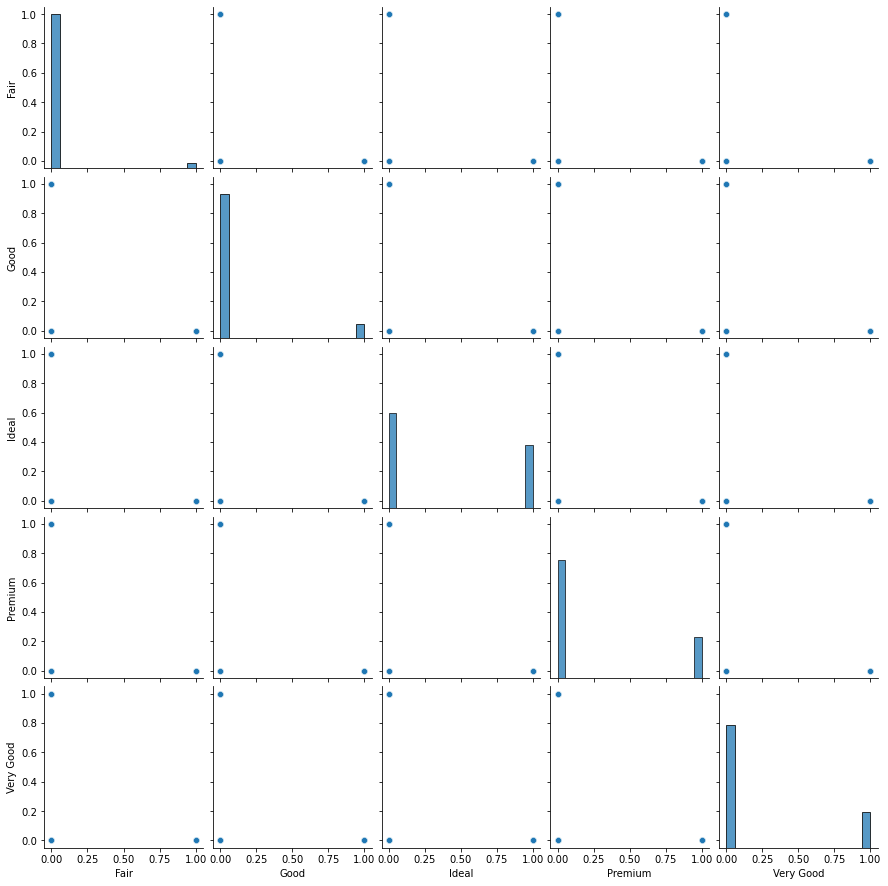

In [7]:
dummies=data_frame
du=pd.get_dummies(dummies["cut"])
dummies=pd.concat([dummies,du],axis='columns')
dummies=dummies.drop(['cut'],axis='columns')
du.describe()

In [6]:
df=data_frame[['carat','price']]
df["carat"] = (-df["carat"] + df["carat"].mean()) / df["carat"].std()
train=df.sample(frac=0.1)
test=df.drop(train.index)
df["carat"]

/tmp/ipykernel_9880/2535380358.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["carat"] = (-df["carat"] + df["carat"].mean()) / df["carat"].std()


0        1.198157
1        1.240350
2        1.198157
3        1.071577
4        1.029384
           ...   
53935    0.164426
53936    0.164426
53937    0.206619
53938   -0.130926
53939    0.101136
Name: carat, Length: 53940, dtype: float64

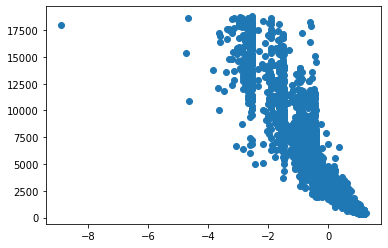

In [7]:
plt.scatter(train.carat,train.price)

In [14]:
def Univariate(x,y,n):
    slope = 1
    intercept = 0
    m = x.size
    learning_rate = 0.003
    losses = []
    while(n>0):
        prediction = slope * x + intercept
        loss = (1 / (2 * m)) * np.sum((y - prediction) ** 2)
        
        if n % 200 == 199:
            print(f"Loss: {loss}")
            
        losses.append(loss)
        
        slope_grad = -np.sum((y - prediction)*x) / m
        intercept_grad = -np.sum((y - prediction)) / m
        slope = slope - (learning_rate * slope_grad)
        intercept = intercept - (learning_rate * intercept_grad)
        n = n - 1
        
    return slope, intercept, losses


In [8]:
class Linear_regression():
    def __init__(self,x,y,w) :
        self.
        
        

SyntaxError: invalid syntax (3818637619.py, line 2)

In [15]:
slope,intercept, losses= Univariate(train.carat,train.price, 5000)



Loss: 15575736.161026357
Loss: 5578716.897380904
Loss: 2543110.219358064
Loss: 1621344.207649172
Loss: 1341448.5911249886
Loss: 1256457.8306378492
Loss: 1230650.2352602216
Loss: 1222813.7094153033
Loss: 1220434.1322164359
Loss: 1219711.5683779938
Loss: 1219492.1601859382
Loss: 1219425.5363486926
Loss: 1219405.3058480413
Loss: 1219399.162801592
Loss: 1219397.2974480987
Loss: 1219396.7310279883
Loss: 1219396.5590327778
Loss: 1219396.5068058823
Loss: 1219396.4909470128
Loss: 1219396.4861314127
Loss: 1219396.484669139
Loss: 1219396.4842251139
Loss: 1219396.4840902842
Loss: 1219396.4840493426
Loss: 1219396.4840369106


(-3681.41891816719, 3945.1636187601116)

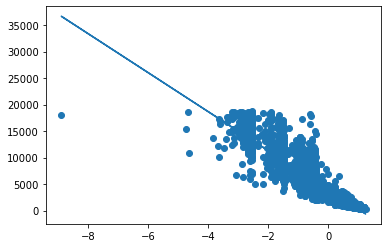

In [16]:
plt.scatter(train.carat,train.price)
plt.plot(train.carat,slope*train.carat+intercept)
slope,intercept

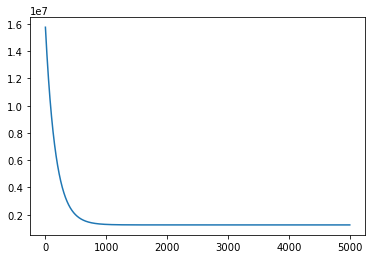

In [103]:
plt.plot(losses)

In [104]:
y_predicted=slope*test.carat+intercept
test.price,y_predicted

(0         326
 1         326
 2         327
 3         334
 4         335
          ... 
 53935    2757
 53936    2757
 53937    2757
 53938    2757
 53939    2757
 Name: price, Length: 48546, dtype: int64,
 0        -475.284863
 1        -630.707816
 2        -475.284863
 3          -9.016003
 4         146.406950
             ...     
 53935    3332.577493
 53936    3332.577493
 53937    3177.154539
 53938    4420.538166
 53939    3565.711923
 Name: carat, Length: 48546, dtype: float64)

In [107]:
mean_squared_error(test.price,y_predicted)

2387114.830402132

In [109]:
mean_squared_error(train.price, slope * train.carat + intercept) / 2

1248151.0068706633